In [29]:
#Import Necessary Libraries
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [30]:
#Explore the data set
listings = pd.read_csv('listings.csv') 
reviews = pd.read_csv('reviews.csv') 
calendar = pd.read_csv('calendar.csv')
print(listings.head())
print(listings.columns) #get overview of columns in the data set
print(F"Number of rows in listings : {listings.shape[0]}")

#print(calendar.head())
print(reviews.head())
print(reviews.columns) #get overview of columns in the data set
print(F"Number of rows in reviews : {reviews.shape[0]}")

print(calendar.head())
print(calendar.columns) #get overview of columns in the data set
print(F"Number of rows in calendar : {calendar.shape[0]}")

#Display basic information about each DataFrame
print(listings.info())
print(reviews.info())
print(calendar.info())

        id                           listing_url       scrape_id last_scraped  \
0   241032   https://www.airbnb.com/rooms/241032  20160104002432   2016-01-04   
1   953595   https://www.airbnb.com/rooms/953595  20160104002432   2016-01-04   
2  3308979  https://www.airbnb.com/rooms/3308979  20160104002432   2016-01-04   
3  7421966  https://www.airbnb.com/rooms/7421966  20160104002432   2016-01-04   
4   278830   https://www.airbnb.com/rooms/278830  20160104002432   2016-01-04   

                                  name  \
0         Stylish Queen Anne Apartment   
1   Bright & Airy Queen Anne Apartment   
2  New Modern House-Amazing water view   
3                   Queen Anne Chateau   
4       Charming craftsman 3 bdm house   

                                             summary  \
0                                                NaN   
1  Chemically sensitive? We've removed the irrita...   
2  New modern house built in 2013.  Spectacular s...   
3  A charming apartment that sits at

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB
None


In [31]:
# Data Cleaning
# Handle missing data in listings
listings.fillna({'review_scores_rating': listings['review_scores_rating'].mean()}, inplace=True)

# Clean the price column in the calendar dataset
calendar['price'] = calendar['price'].replace('[\$,]', '', regex=True).astype(float)

# Handle missing data in the calendar
calendar['price'].fillna(calendar['price'].mean(), inplace=True)

# Clean the price column in the listings dataset
listings['price'] = listings['price'].replace('[\$,]', '', regex=True).astype(float)

# Encode categorical data if necessary
listings['property_type'] = listings['property_type'].astype('category')
listings['room_type'] = listings['room_type'].astype('category')

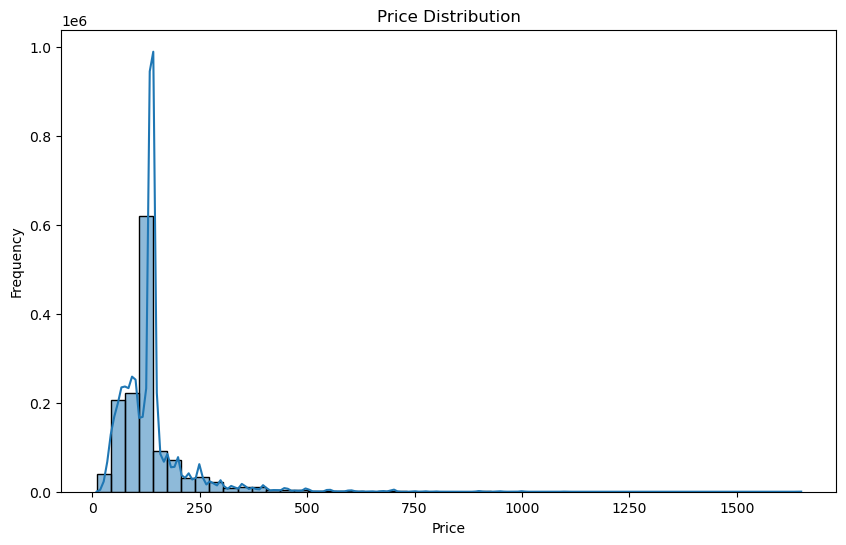

In [32]:
# Visualize price distribution
plt.figure(figsize=(10, 6))
sns.histplot(calendar['price'], bins=50, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

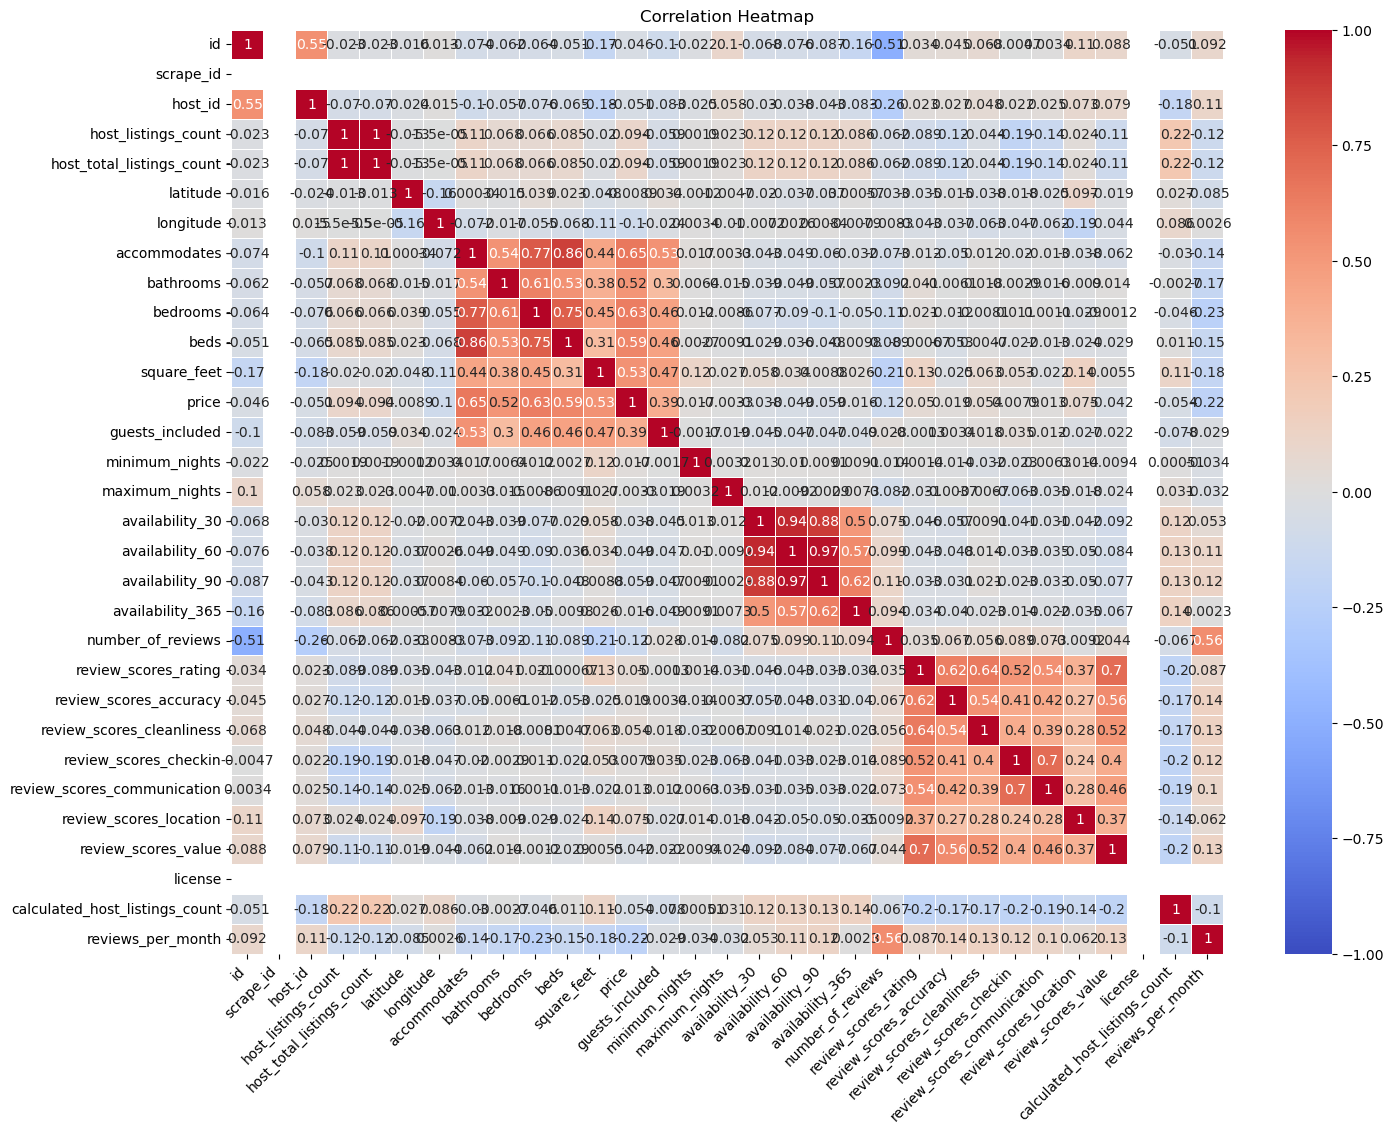

In [35]:
# Correlation heatmap for listings
plt.figure(figsize=(16, 12))  # Increased figure size
corr_matrix = listings.corr(numeric_only=True)

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)

# Rotate x and y axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title('Correlation Heatmap')
plt.show()


In [36]:
# Question 1: Pricing Optimization
# Price statistics
price_stats = calendar['price'].describe()
print(price_stats)

count    1.393570e+06
mean     1.379449e+02
std      8.603679e+01
min      1.000000e+01
25%      9.000000e+01
50%      1.379449e+02
75%      1.379449e+02
max      1.650000e+03
Name: price, dtype: float64


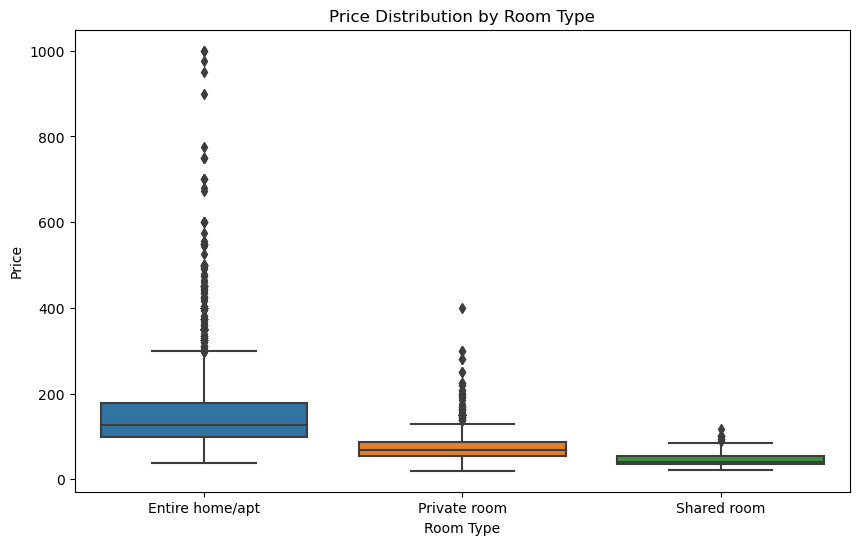

In [45]:
# Visualize price by room type
plt.figure(figsize=(10, 6))
sns.boxplot(x='room_type', y='price', data=listings)
plt.title('Price Distribution by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.show()


In [38]:
# Occupancy analysis
calendar['date'] = pd.to_datetime(calendar['date'])
occupied_days = calendar[calendar['available'] == 'f'].groupby('listing_id').size()
print(occupied_days.describe())


count    3140.000000
mean      146.187261
std       125.484371
min         1.000000
25%        23.000000
50%       118.000000
75%       272.000000
max       365.000000
dtype: float64


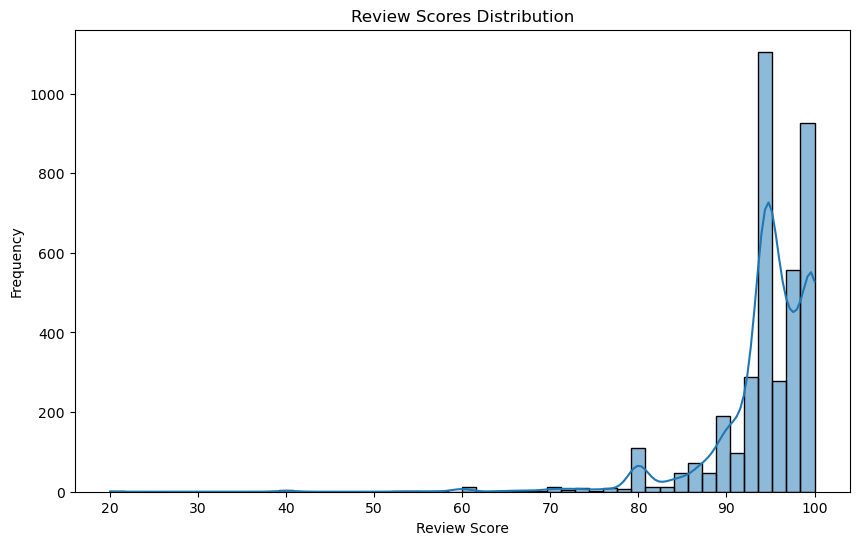

In [39]:
# Question 2: Guest Satisfaction
# Review scores distribution
plt.figure(figsize=(10, 6))
sns.histplot(listings['review_scores_rating'], bins=50, kde=True)
plt.title('Review Scores Distribution')
plt.xlabel('Review Score')
plt.ylabel('Frequency')
plt.show()

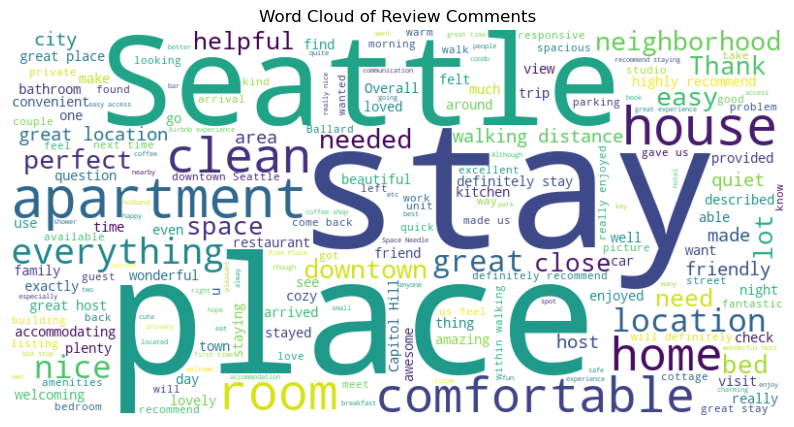

In [40]:
# Generate word cloud for reviews
all_comments = ' '.join(reviews['comments'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_comments)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Review Comments')
plt.show()

<Figure size 1500x700 with 0 Axes>

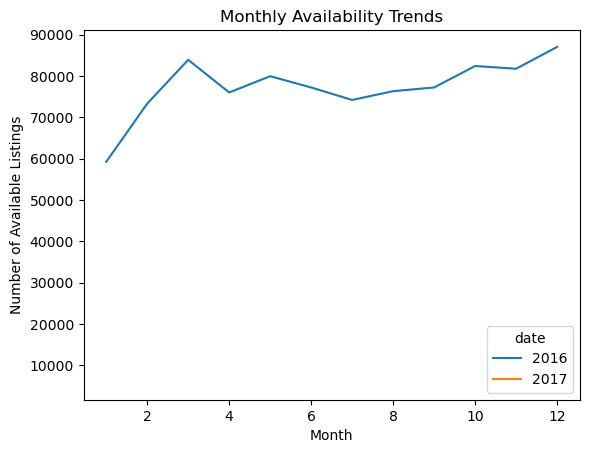

In [41]:
# Question 3: Availability Trends
# Availability trends over time
calendar['date'] = pd.to_datetime(calendar['date'])
monthly_availability = calendar.groupby([calendar['date'].dt.year, calendar['date'].dt.month])['available'].apply(lambda x: (x == 't').sum()).unstack().T

plt.figure(figsize=(15, 7))
monthly_availability.plot(kind='line')
plt.title('Monthly Availability Trends')
plt.xlabel('Month')
plt.ylabel('Number of Available Listings')
plt.show()

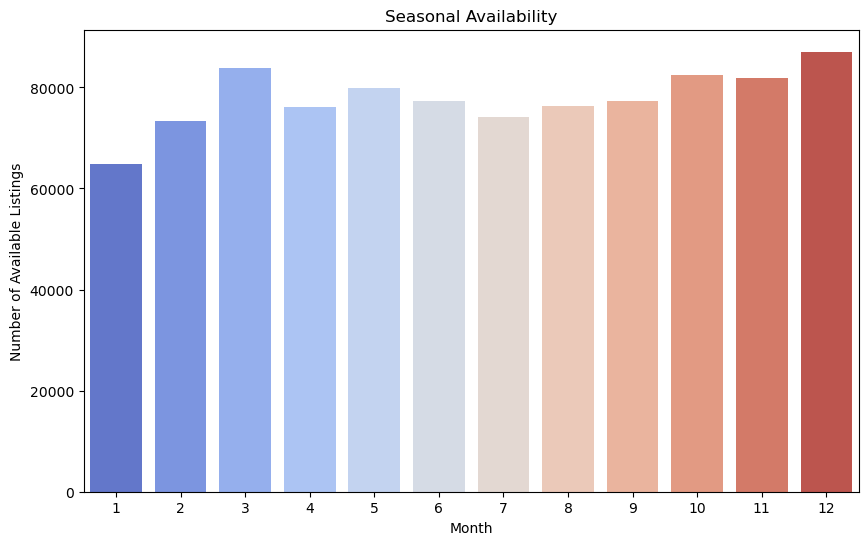

In [42]:
# Seasonal analysis
calendar['month'] = calendar['date'].dt.month
seasonal_availability = calendar.groupby('month')['available'].apply(lambda x: (x == 't').sum()).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='available', data=seasonal_availability, palette='coolwarm')
plt.title('Seasonal Availability')
plt.xlabel('Month')
plt.ylabel('Number of Available Listings')
plt.show()

In [43]:
# Business Insights
# Pricing Optimization Insights
print("Pricing Optimization Insights: Adjusting prices based on factors such as room type and property type can help optimize revenue.")

Pricing Optimization Insights: Adjusting prices based on factors such as room type and property type can help optimize revenue.


In [44]:
# Guest Satisfaction Insights
print("Guest Satisfaction Insights: Cleanliness, location, and amenities are key factors influencing guest satisfaction.")

Guest Satisfaction Insights: Cleanliness, location, and amenities are key factors influencing guest satisfaction.
